<a href="https://colab.research.google.com/github/clubdesoftware-ec/2025-A/blob/main/proyectos/Predicci%C3%B3n_Demanda/Prediccion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Cargar el archivo (ajusta el nomre del archivo)
df = pd.read_excel(r"/content/drive/MyDrive/BROCOLI CONGELADO 2023.xlsx")
print(df.head())

                       RAZON SOCIAL  POTENCIAL UNO  NOMBRE COMERCIAL  \
0  NOVA ALIMENTOS ALIMENNOVASA S.A.            NaN               NaN   
1  NOVA ALIMENTOS ALIMENNOVASA S.A.            NaN               NaN   
2                    PROVEFRUT S.A.            NaN               NaN   
3                    PROVEFRUT S.A.            NaN               NaN   
4                    PROVEFRUT S.A.            NaN               NaN   

             RUC                   CONSIGNATARIO POSICION ARANCELARIA  \
0  1791404785001            IZUMI COSMO CO.,LTD.        0710.80.20.00   
1  1791404785001  SIEMSSEN TIEFKUHLPRODUKTE GMBH        0710.80.20.00   
2  1790971937001  SIEMSSEN TIEFK HLPRODUKTE GMBH        0710.80.20.00   
3  1790971937001            SNOW FRESH FOODS INC        0710.80.20.00   
4  1790971937001  SIEMSSEN TIEFK HLPRODUKTE GMBH        0710.80.20.00   

  DESCRIPCION POSICION                    DESCRIPCION DEL DESPACHO  \
0            --Brocoli         KG. BROCCOLI FLORETS IQF 20

In [4]:
print(df.shape) # Filas y Columnas
print(df.info()) # Información General

(6702, 63)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6702 entries, 0 to 6701
Data columns (total 63 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   RAZON SOCIAL                        6702 non-null   object        
 1   POTENCIAL UNO                       0 non-null      float64       
 2   NOMBRE COMERCIAL                    0 non-null      float64       
 3   RUC                                 6702 non-null   int64         
 4   CONSIGNATARIO                       4655 non-null   object        
 5   POSICION ARANCELARIA                6702 non-null   object        
 6   DESCRIPCION POSICION                6702 non-null   object        
 7   DESCRIPCION DEL DESPACHO            6702 non-null   object        
 8   REFRENDO                            6702 non-null   int64         
 9   ITEM                                6702 non-null   int64         
 10  DAU          

In [5]:
print(df['TOTAL FOB U$S'].describe()) # Estadísticas

count     6437.000000
mean     48185.472613
std      16224.517251
min          1.550000
25%      30562.420000
50%      60000.000000
75%      60000.000000
max      83843.730000
Name: TOTAL FOB U$S, dtype: float64


In [6]:
df1 = df.dropna(axis=1, how="all") # axis = 1 elimina columnas vacías

In [7]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6702 entries, 0 to 6701
Data columns (total 47 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   RAZON SOCIAL                        6702 non-null   object        
 1   RUC                                 6702 non-null   int64         
 2   CONSIGNATARIO                       4655 non-null   object        
 3   POSICION ARANCELARIA                6702 non-null   object        
 4   DESCRIPCION POSICION                6702 non-null   object        
 5   DESCRIPCION DEL DESPACHO            6702 non-null   object        
 6   REFRENDO                            6702 non-null   int64         
 7   ITEM                                6702 non-null   int64         
 8   FECHA DESPACHO                      6702 non-null   datetime64[ns]
 9   FECHA EMBARQUE                      3972 non-null   datetime64[ns]
 10  REGIMEN                 

In [8]:
df1['CONTENEDORES'].head()

,CONTENEDORES
0,0
1,0
2,0
3,0
4,0


In [9]:
import datetime as dt
df1["FECHA DESPACHO"] = pd.to_datetime(df1["FECHA DESPACHO"])

<ipython-input-9-b205ac054f2b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["FECHA DESPACHO"] = pd.to_datetime(df1["FECHA DESPACHO"])


In [10]:
df = df1[["FECHA DESPACHO","KGS NETO", "PAIS DESTINO", "ACTIVIDAD PRINCIPAL DEL EXPORTADOR","ESTADO MERCADERIA", "AGENCIA TRANSPORTE","ITEM","TOTAL FOB U$S"]]

In [ ]:
df['ESTADO MERCADERIA'].value_counts()

ESTADO MERCADERIA
NUEVO    6700
OTROS       2
Name: count, dtype: int64

In [ ]:
df["año"] = df["FECHA DESPACHO"].dt.year
df["mes"] = df["FECHA DESPACHO"].dt.month
df["dia"] = df["FECHA DESPACHO"].dt.day
df["dia_semana"] = df["FECHA DESPACHO"].dt.weekday # 0 = Lunes, 6 = Domingo

<ipython-input-11-d3a8b55d49cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["año"] = df["FECHA DESPACHO"].dt.year
<ipython-input-11-d3a8b55d49cf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["mes"] = df["FECHA DESPACHO"].dt.month
<ipython-input-11-d3a8b55d49cf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

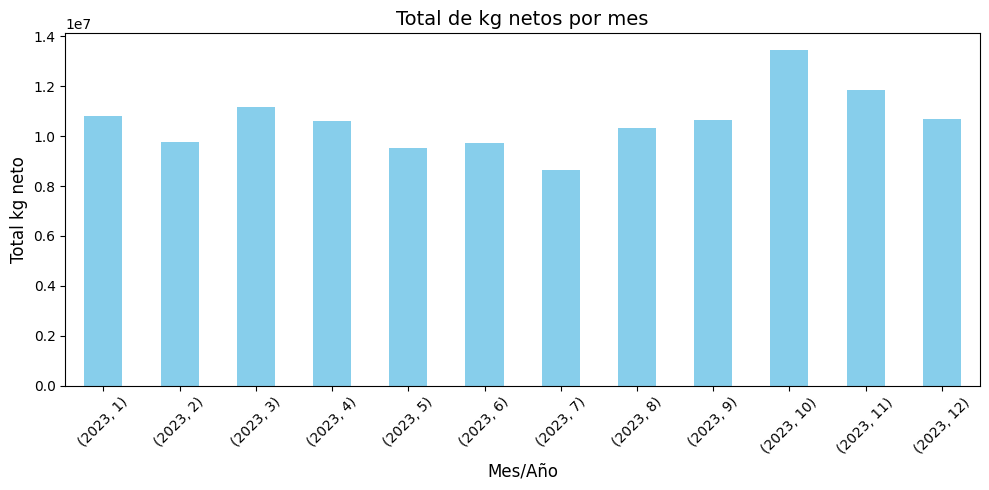

In [ ]:
kg_mensual = df.groupby(["año","mes"])['KGS NETO'].sum()
plt.figure(figsize=(10, 5))
kg_mensual.plot(kind='bar', color='skyblue')
plt.title('Total de kg netos por mes', fontsize=14)
plt.xlabel('Mes/Año', fontsize=12)
plt.ylabel('Total kg neto', fontsize=12)
plt.xticks(rotation=45)  # Asegurarse de que las etiquetas de los meses sean legibles
plt.tight_layout()
plt.show()

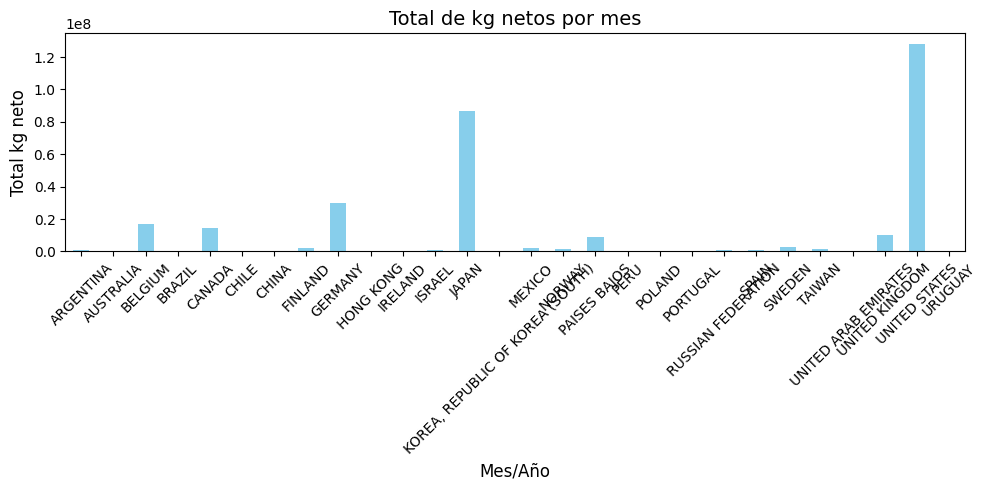

In [ ]:
kg_mensual = df.groupby('PAIS DESTINO')['TOTAL FOB U$S'].sum()
plt.figure(figsize=(10, 5))
kg_mensual.plot(kind='bar', color='skyblue')
plt.title('Total de kg netos por mes', fontsize=14)
plt.xlabel('Mes/Año', fontsize=12)
plt.ylabel('Total kg neto', fontsize=12)
plt.xticks(rotation=45)  # Asegurarse de que las etiquetas de los meses sean legibles
plt.tight_layout()
plt.show()

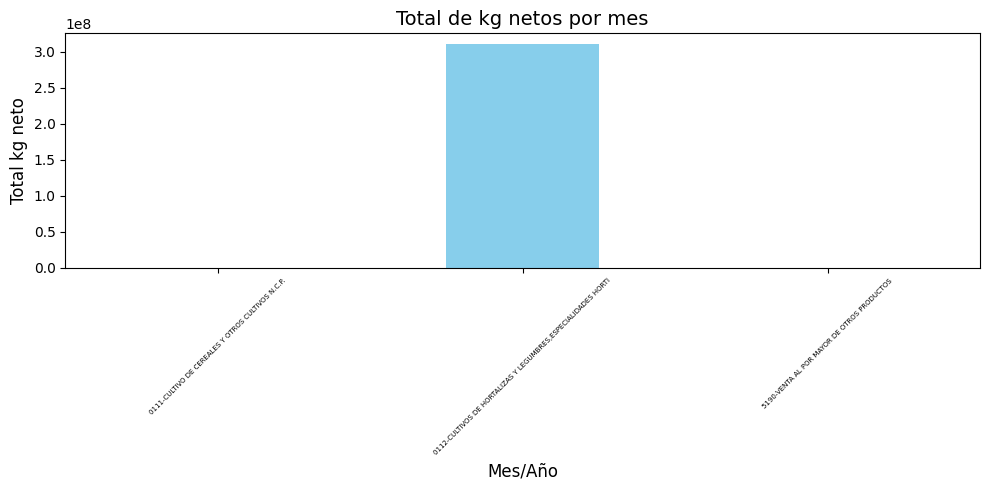

In [ ]:
kg_mensual = df.groupby('ACTIVIDAD PRINCIPAL DEL EXPORTADOR')['TOTAL FOB U$S'].sum()
plt.figure(figsize=(10, 5))
kg_mensual.plot(kind='bar', color='skyblue')
plt.title('Total de kg netos por mes', fontsize=14)
plt.xlabel('Mes/Año', fontsize=12)
plt.ylabel('Total kg neto', fontsize=12)
plt.xticks(rotation=45, fontsize = 5)  # Asegurarse de que las etiquetas de los meses sean legibles
plt.tight_layout()
plt.show()

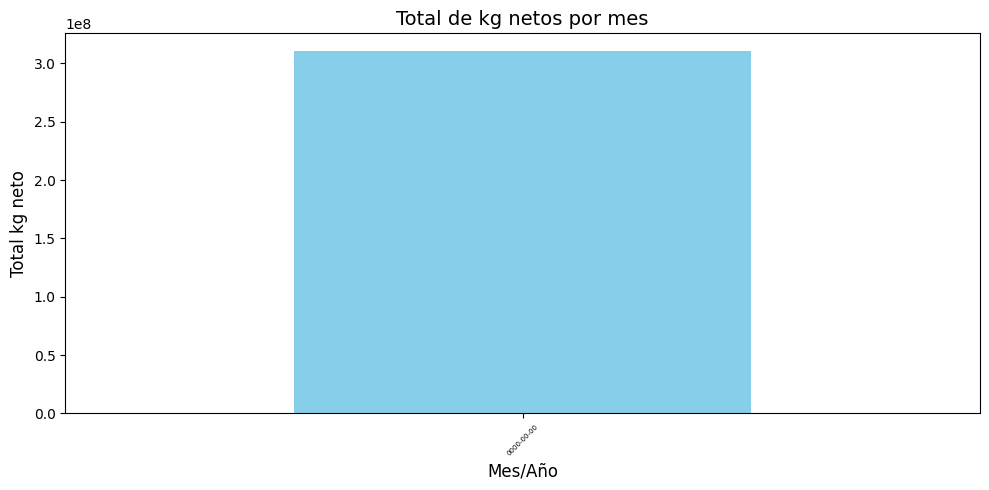

In [ ]:
kg_mensual = df.groupby('AGENCIA TRANSPORTE')['TOTAL FOB U$S'].sum()
plt.figure(figsize=(10, 5))
kg_mensual.plot(kind='bar', color='skyblue')
plt.title('Total de kg netos por mes', fontsize=14)
plt.xlabel('Mes/Año', fontsize=12)
plt.ylabel('Total kg neto', fontsize=12)
plt.xticks(rotation=45, fontsize = 5)  # Asegurarse de que las etiquetas de los meses sean legibles
plt.tight_layout()
plt.show()

In [ ]:
df1["año"] = df["FECHA DESPACHO"].dt.year
df1["mes"] = df["FECHA DESPACHO"].dt.month
df1["dia"] = df["FECHA DESPACHO"].dt.day
df1["dia_semana"] = df["FECHA DESPACHO"].dt.weekday

In [ ]:
Codigo_Pais = {value: key for key, value in enumerate(df1["PAIS DESTINO"].unique())}


In [ ]:
df1["PAIS DESTINO"] = df1["PAIS DESTINO"].map(Codigo_Pais)

In [ ]:
X = df1[["año", "mes", "dia","dia_semana","KGS NETO", "PAIS DESTINO","ITEM","TOTAL FOB U$S"]]
y = df1["FOB U$S"]

In [ ]:
print(X.head())

    año  mes  dia  dia_semana  KGS NETO  PAIS DESTINO  ITEM  TOTAL FOB U$S
0  2023    1    7           5   16890.0             0     1       27361.82
1  2023    1   10           1   20880.0             1     1       24429.60
2  2023    1    1           6   21200.0             2     1       60000.00
3  2023    1    1           6   21200.0             3     1       60000.00
4  2023    1    1           6   21200.0             2     1       60000.00


In [ ]:
df1 = df1.drop("FECHA DESPACHO", axis=1, errors='ignore')

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state= 42, test_size=0.2)

In [ ]:
## Escalar datos
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
## Crear la red neuronal
import tensorflow as tf

In [ ]:
X_train.shape

(5361, 8)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
## Red neuronal
model = Sequential()
model.add(Dense(8,activation = "relu",input_shape = (X_train.shape[1],)))   ## Capa de entrada
model.add(Dense(16,activation ="relu"))    ## capa oculta
model.add(Dense(16,activation ="relu"))    ## capa oculta
model.add(Dense(1))    ## capa de salida

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
## Compilar el modelo
model.compile(optimizer = "adam",loss = "mse",metrics = ["mae"])

In [ ]:
epocas = 100
history = model.fit(X_train,y_train,epochs = epocas,validation_split=0.10)

Epoch 1/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/100
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 10/100
151/151 ━━━━━━━━━━━━━━━━